In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-06-05 08:14:58--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   102MB/s    in 0.6s    

2020-06-05 08:14:59 (102 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
import zipfile

In [ ]:
zip_file=zipfile.ZipFile('/tmp/cats_and_dogs_filtered.zip')
zip_file.extractall('/tmp/dogs_cats')
zip_file.close()

In [4]:
path=os.path.join('/tmp/cats_dogs/cats_and_dogs_filtered')

['cats_and_dogs_filtered']

In [ ]:
path=os.path.join(path,'cats_and_dogs_filtered')
train_path=os.path.join(path,'train')
test_path=os.path.join(path,'validation')

In [6]:
train_path,test_path


('/tmp/dogs_cats/cats_and_dogs_filtered/train',
 '/tmp/dogs_cats/cats_and_dogs_filtered/validation')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_gen=ImageDataGenerator(rescale=1/255)

In [29]:
train_gen=img_gen.flow_from_directory(train_path,
                                      target_size=(200,200),
                                      class_mode='binary',
                                      batch_size=20,shuffle=True)
test_gen=img_gen.flow_from_directory(test_path,
                                     target_size=(200,200),
                                     class_mode='binary',
                                     batch_size=20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout
from tensorflow.keras.optimizers import RMSprop

In [37]:
model=keras.Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),input_shape=(200,200,3),padding='VALID',activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='VALID',activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='VALID',activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation=tf.nn.relu))
model.add(Dense(units=1,activation=tf.nn.sigmoid))
model.compile(optimizer=RMSprop(learning_rate=0.0001),loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 23, 23, 128)      

In [38]:
model.fit(train_gen,epochs=20,steps_per_epoch=100,validation_data=test_gen,validation_steps=50)

Epoch 1/20
100/100 [==============================] - 12s 125ms/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
100/100 [==============================] - 12s 123ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/20
100/100 [==============================] - 12s 124ms/step - loss: 0.6954 - accuracy: 0.4975 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
100/100 [==============================] - 12s 122ms/step - loss: 0.6928 - accuracy: 0.5030 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 5/20
100/100 [==============================] - 12s 124ms/step - loss: 0.6811 - accuracy: 0.5455 - val_loss: 0.6727 - val_accuracy: 0.6090
Epoch 6/20
100/100 [==============================] - 12s 124ms/step - loss: 0.6711 - accuracy: 0.5765 - val_loss: 0.6649 - val_accuracy: 0.6360
Epoch 7/20
100/100 [==============================] - 12s 122ms/step - loss: 0.6592 - accuracy: 0.6180 - val_loss: 0.6615 - val_ac

In [ ]:
loss=model.history.history['loss']
val_loss=model.history.history['val_loss']
acc=model.history.history['accuracy']
val_acc=model.history.history['val_accuracy']

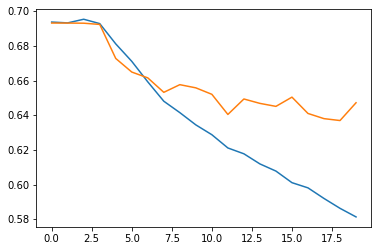

In [41]:
plt.plot(loss)
plt.plot(val_loss)

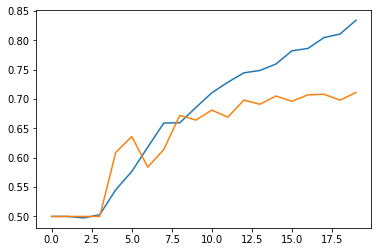

In [42]:
plt.plot(acc)
plt.plot(val_acc)

In [ ]:
### Visualization of images

In [44]:
model_layers=model.layers
model_layers

In [46]:
layer_outputs=[layer.output for layer in model_layers[1:]]
layer_outputs

[<tf.Tensor 'max_pooling2d_24/Identity:0' shape=(None, 99, 99, 32) dtype=float32>,
 <tf.Tensor 'conv2d_25/Identity:0' shape=(None, 97, 97, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_25/Identity:0' shape=(None, 48, 48, 64) dtype=float32>,
 <tf.Tensor 'dropout_8/Identity:0' shape=(None, 48, 48, 64) dtype=float32>,
 <tf.Tensor 'conv2d_26/Identity:0' shape=(None, 46, 46, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_26/Identity:0' shape=(None, 23, 23, 128) dtype=float32>,
 <tf.Tensor 'flatten_8/Identity:0' shape=(None, 67712) dtype=float32>,
 <tf.Tensor 'dense_16/Identity:0' shape=(None, 128) dtype=float32>,
 <tf.Tensor 'dense_17/Identity:0' shape=(None, 1) dtype=float32>]

In [ ]:
visualize_model=tf.keras.models.Model(inputs=model.input,outputs=layer_outputs)

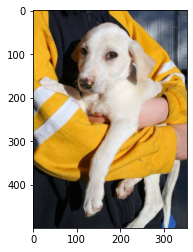

In [53]:
## Lets take an image and predict
sample_image=os.path.join(train_path,'dogs/dog.907.jpg')
sample_image=plt.imread(sample_image)
plt.imshow(sample_image)


In [55]:
sample_image.shape

(500, 353, 3)

In [57]:
import cv2
sample_image=cv2.imread(os.path.join(train_path,'dogs/dog.907.jpg'))
sample_image=cv2.resize(sample_image,(200,200))
sample_image.shape



(200, 200, 3)

In [ ]:
sample_image=sample_image.reshape((-1,200,200,3))

In [ ]:
sample_image_output=visualize_model.predict(sample_image)

In [61]:
len(sample_image_output)

9

In [ ]:
### Lets see how images are taking from layer 4
layer_4=sample_image_output[3]

In [63]:
layer_4.shape

(1, 48, 48, 64)

In [ ]:
layer_4=layer_4.reshape((48,48,64))

In [ ]:
### lets see 5th image
layer_4_5=layer_4[:,:,4]

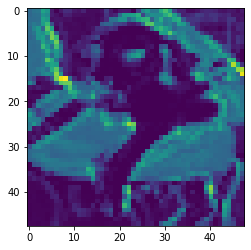

In [67]:
plt.imshow(layer_4_5)

In [ ]:
layer_4_5=np.hstack((layer_4_5,layer_4[:,:,5]))


In [80]:
layer_4_5.shape

(48, 192)

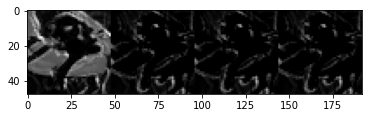

In [81]:
plt.imshow(layer_4_5,cmap='gray')

In [ ]:
image=np.zeros((48,48),dtype=np.float32)
for i in range(int(layer_4.shape[2]/4)):
  image=np.hstack((image,layer_4[:,:,i]))


  

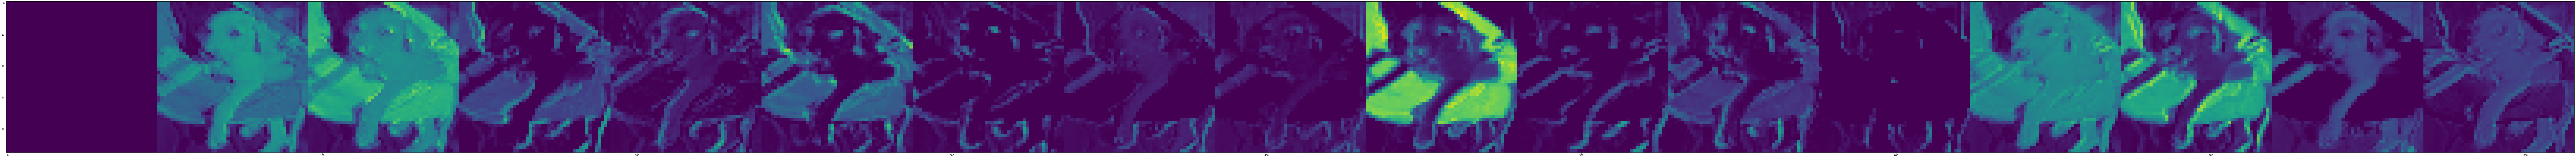

In [121]:
n_features=64
scale=20./2
plt.figure( figsize=(200,200 ) )
plt.imshow(image)

In [116]:
int(layer_4.shape[2]/2.0)

32

In [ ]:
import os, signal

os.kill(     os.getpid() , 
         signal.SIGKILL
       )